# Manipulation des matrices et des vecteurs avec NumPy

![image](./images/numpy.png)

# NumPy

NumPy est un package Python spécialement adaptée à la manipulation de matrices ou de tableaux multidimensionnels et possédant des fonctions mathématiques opérant sur ces tableaux.

Généralement pour simplifier l’appel aux fonctions NumPy, on utilise :
```
import numpy as np
```
Il est installé par défaut dans la suite Anaconda.

In [1]:
import numpy as np

# Numpy, les origines de la data en Python

- Numpy est le premier package de traitement de données en Python
- Il est basé sur un ensemble de fonctions codées en C
- Il combine une classe : les ndarray et des fonctions universelles
- Il est le socle de la plupart des packages de data science

Numpy utilise des array
- un array est l'équivalent d'un tenseur
- un array à unedimension est un vecteur
- un array à deux dimensions est une matrice

On utilise les arrays pour travailler sur des données non structurées :
- une image est représentée par un array à 3 dimensions
- une vidéo est représenté par un array à 4 dimensions
- ...

# NumPy et les arrays

- Les arrays sont des structures centrales pour travailler en data science. 
- Les arrays de NumPy sont utilisées comme des vecteurs ou des matrices
- On crée un array en utilisant la fonction `np.array()`, on peut créer un array à partir d’une liste ou de plusieurs listes
- Les arrays ne se compose que d’un type de données (dans sa forme classique)
- Pour connaître la taille d’un array, on utilise la fonction `.shape`
- Pour connaître le type de données dans l’array, on utilise `.dtype`

In [2]:
#1er array
arr1 = np.array([3,5.5,7])
print(arr1.shape,arr1.dtype)

(3,) float64


In [3]:
arr1

array([3. , 5.5, 7. ])

In [4]:
type(arr1[0])

numpy.float64

In [5]:
arr1.dtype

dtype('float64')

## Un peu de vocabulaire

- Les dimensions sont appelées `axis` (`axis=0` : colonnes, `axis=1` : lignes)
- Le nombre de dimensions est appelé `.ndim`
- La taille (`.size`) est le nombre total d’éléments d’un array
- La forme est associée à `.shape`

# Numpy et les arrays

On peut générer des arrays de manière simple :

In [6]:
np.array([ ], dtype=float)

array([], dtype=float64)

In [7]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [8]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
np.empty(5)

array([0., 0., 0., 0., 0.])

In [10]:
np.full((2,3), 10)

array([[10, 10, 10],
       [10, 10, 10]])

# D'autres générateurs d'arrays

- `np.arange(5)` pour créer un array de taille 5 avec des valeurs de 0 à 4, on peut utilise `start=`, `stop=` et `step=`
- On peut utiliser arange avec des float mais on préfère généralement `np.linspace`
    - Cette fonction génère un nombre donné de valeur équidistante entre deux bornes


In [11]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

# Premières opérations arithmétiques

Les opérations arithmétiques de bases se font terme à terme

`*`, `+`, `-`, `/`, `**` (puissance), `%` (modulo)


In [12]:
arr2=np.arange(1,4)

In [13]:
print(arr2+arr2)
print(arr2*arr2)
print(arr2/arr2)
# attention les vecteurs doivent avoir les mêmes dimensions

[2 4 6]
[1 4 9]
[1. 1. 1.]


In [14]:
arr3 = np.array([3,7,9],dtype=float)

In [15]:
arr3

array([3., 7., 9.])

## Un cas spécifique : le broadcasting

Dans certains cas, on peut effectuer des calculs entre des arrays de tailles différentes.

Pour pouvoir faire cela, il suffit d'avoir une dimension commune, on a :

In [16]:
arr_id=np.eye(3)
arr_id*arr2

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

### Le broadcasting sur une image avec NumPy

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
image_ny=plt.imread("./Data/New York.jpg")

**Exercice :** Essayez de modifier les couleurs de cette image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


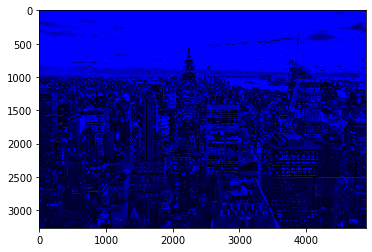

In [19]:
# on multiplie par 2 tous les entiers associés aux bleus
plt.imshow(image_ny*np.array([0,0,2]))

In [20]:
image_ny2 = image_ny*np.array([0,0,2])

In [22]:
# on sauvegarde l'image
plt.imsave("ny_bleu.png",image_ny2.astype('uint8'))

In [23]:
image_ny.shape

(3264, 4896, 3)

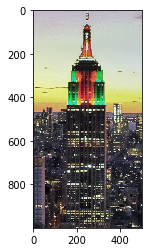

In [24]:
# on affiche un "extrait" de l'image
plt.imshow(image_ny[500:1500,2000:2500,:])

# Manipulation d'arrays

L'indexation des arrays est similaire à celle des listes :
- Accéder à un élément : `arr1[i]`
- Si on veut plusieurs éléments, on peut utiliser `arr1[i:j]`
- On peut aussi fixer des valeurs pour plusieurs éléments : `arr1[i:j]=100`
- On peut aussi modifier toutes les valeurs de l’array : `array[:]=100`
- Si on veut garder l’array initial on utilise `.copy()`


**Exercice :**
    
Générer un array avec des valeurs entre 0 et 8, afficher les éléments 1 à 6 puis modifiez les élément 6 à 8 en leur fixant la valeur de 22.


In [25]:
arr_range=np.arange(9)

In [26]:
arr_range[1:6]

array([1, 2, 3, 4, 5])

In [27]:
arr_range[6:]=22
arr_range

array([ 0,  1,  2,  3,  4,  5, 22, 22, 22])

# Passage au cas bidimensionnel

Le seule attribut qui change est `.shape`, on peut utiliser la méthode `.reshape()`

In [28]:
arr_2dim=np.arange(10).reshape(5,2)

In [29]:
# Pour fixer une valeur pour tous les éléments d’une ligne, on utilise 
arr_2dim[2]=22
# Pour fixer une valeur pour un seul élément, on utilise 
arr_2dim[3,1]=33
# On peut aussi sélectionner des sous-parties d’un array à 2 dimensions

# Opérations matricielles sur les arrays

On peut créer une matrice (un array) en utilisant la fonction `.reshape` :
- Pour créer une matrice 4 x 5 à partir d’une suite de 20 nombres, on utilise :
```
np.arange(20).reshape((4,5))
```
- Transposée : `.T`
- Produit matriciel `np.dot()`

**Exercice :**

Construire une matrice rectangulaire de taille 3 x 2 avec une suite de nombres commençant à 5, calculer le produit de la transposée par la matrice.

In [30]:
arr_mat = np.arange(5,11).reshape((3,2))

In [31]:
np.dot(arr_mat.T,arr_mat)

array([[155, 176],
       [176, 200]])

In [32]:
np.dot(arr_mat.transpose(),arr_mat)

array([[155, 176],
       [176, 200]])

In [33]:
arr_mat.T.dot(arr_mat)

array([[155, 176],
       [176, 200]])

In [34]:
arr_mat.transpose().dot(arr_mat)

array([[155, 176],
       [176, 200]])

# Les fonctions universelles sur les arrays
NumPy possède de nombreuses fonctions sur les arrays permettant de manipuler des arrays
- `np.where(condition, A, B)` permet de faire une condition de manière simple
- `np.sum()`
- `np.mean()`
- `np.std()`
- `np.var()`
- `np.median()`
- `np.percentile()`
- `np.average()` : moyenne pondérée


Sur des booléens :
- `np.any()` au moins un `True`
- `np.all()` tous `True`

Les tris :
- `np.sort()`
- `np.argsort()`

Sur des chaînes :
- `np.unique()` permet d’obtenir chaque valeur unique
- `np.in1d(,)` permet de vérifier si les éléments du 1er membre se trouvent dans le second



**Exercice :**

Générer un array de nombres aléatoires `np.random.randn()` puis remplacer les valeurs plus petites que  0 par 0. Trier l’array obtenu


In [35]:
arr_rand = np.random.randn(1000000)

In [36]:
%%timeit
arr_rand2=arr_rand.copy()
for i,val in enumerate(arr_rand):
    if val<0:
        arr_rand2[i]=0

595 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit 
arr_rand2 = np.where(arr_rand<0,0,arr_rand)

7.67 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Sauvegarder et charger des arrays

On utilise :
- `np.save('mon_array',mon_array)` pour sauver un array
- `np.load('mon_array.npy')` pour charger un array
- `np.savez('ziparray.npz', x=mon_array, y=mpn_array2)` sauvegarder en zip plusieurs arrays
- `np.savetxt('textfile.txt', mon_array, delimiter=';')` pour sauvegarder un array dans un fichier texte
- `np.loadtxt('textfile.txt', delimiter=';')` pour charger un array depuis un fichier texte


**Exercice :**
    
Générer une matrice simple et sauvegarder cette matrice dans array.npy puis dans array.txt


In [38]:
arr_rand3 = np.random.randn(100000000).reshape(-1,100)

In [39]:
%time np.save("./mon_array",arr_rand3)

Wall time: 2.65 s


In [40]:
del arr_rand3

In [41]:
%time arr_rand3 = np.load("mon_array.npy")

Wall time: 628 ms
